In [43]:
import numpy as np
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from analysis import *

## Loading data

In [44]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

In [45]:
def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

In [ ]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)

In [ ]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

## MUSIC for DOA test

In [46]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

In [47]:
def cartesian_to_arg(cartesian_coords):
    return np.angle(cartesian_coords[0] + cartesian_coords[1] * 1j)

In [48]:
def plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, nb_doas, time_t, resolution):
    doas, _, _, psd, thetas = music_algorithm(cov[time_t], antenna_positions, wavelength, nb_doas, resolution=resolution)
    thetas *= np.pi/180
    print(doas)
    plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", thetas, psd/np.max(psd), '-k')
    plt.show()

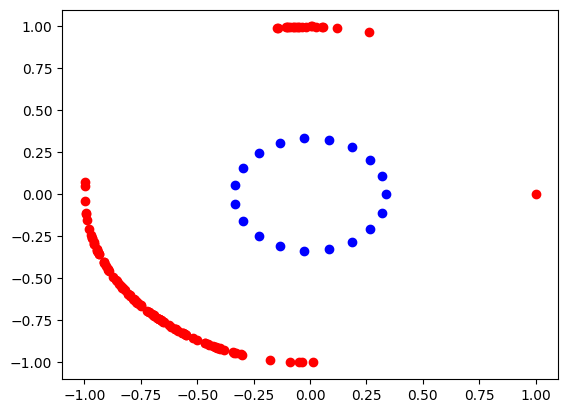

Dataset I
1
[226.95]


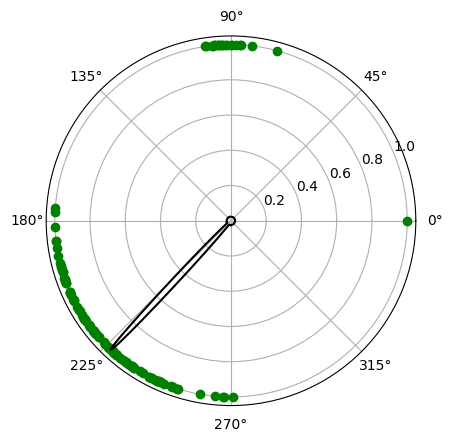

2
[227.55]


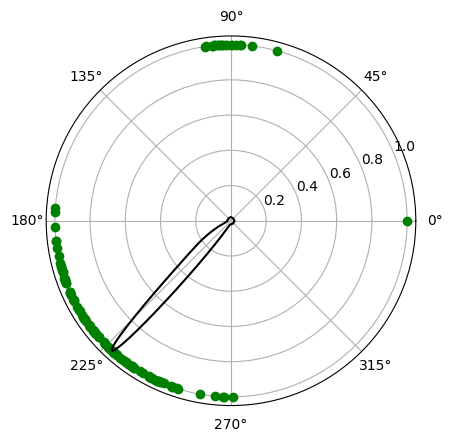

3
[223.95 236.85]


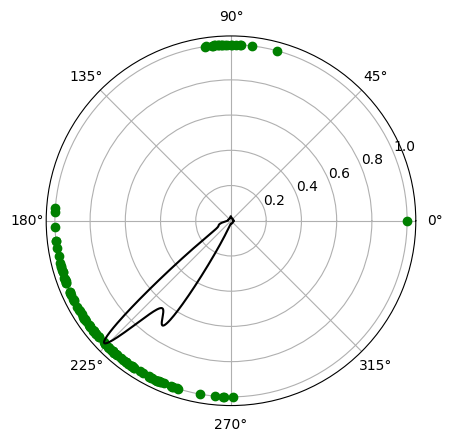

4
[ 91.8  203.1  221.25 240.15]


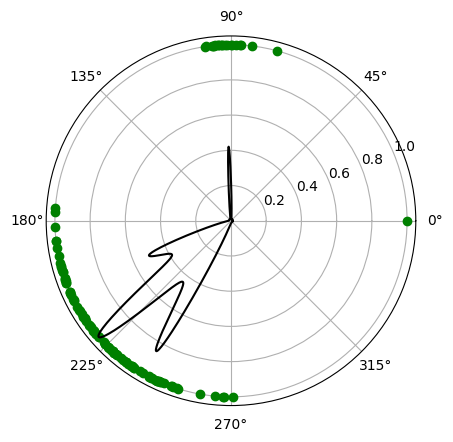

5
[ 92.55 194.4  216.3  232.05]


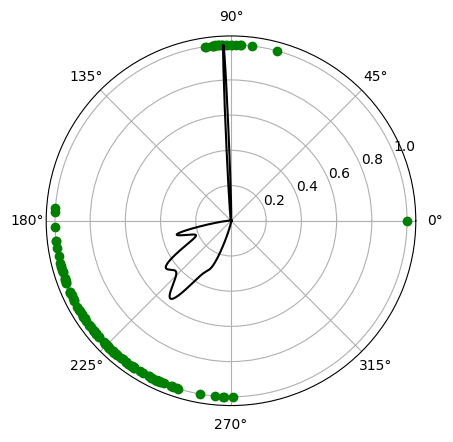

6
[ 92.1  200.25 222.15 240.15 259.5 ]


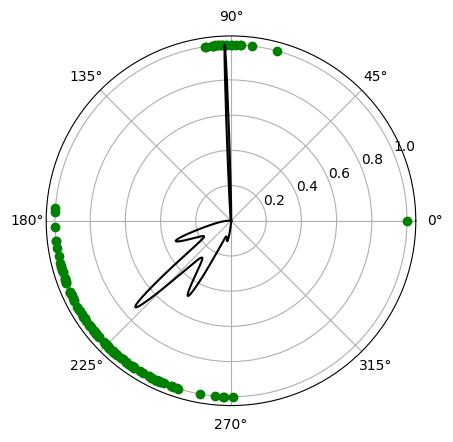

7
[ 93.3  186.3  202.95 223.65 242.1  262.65]


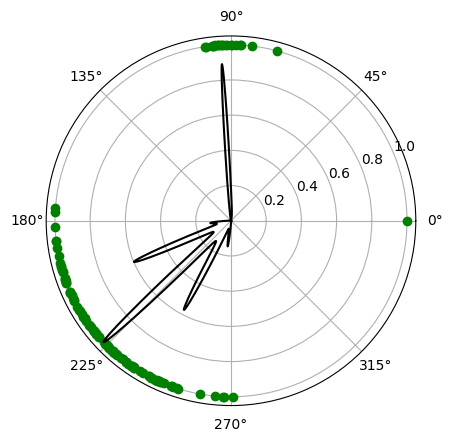

8
[ 93.3  203.55 224.25 244.8  261.75]


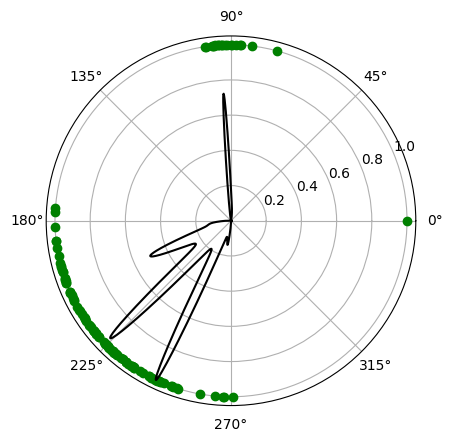

9
[ 87.15  94.05 182.7  200.4  222.   246.3  263.1 ]


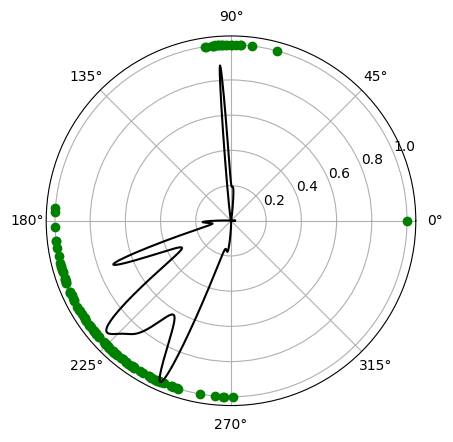

10
[ 93.75 182.55 200.4  222.6  246.   262.35]


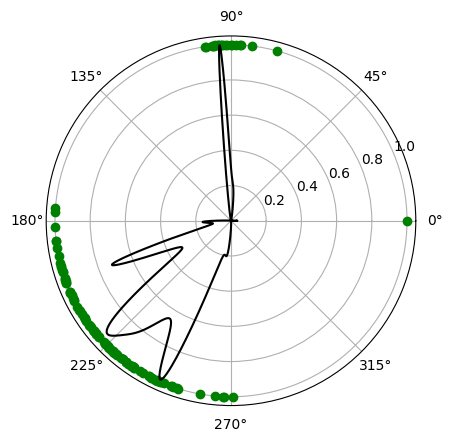

11
[ 93.6  200.25 226.8  245.4  262.35]


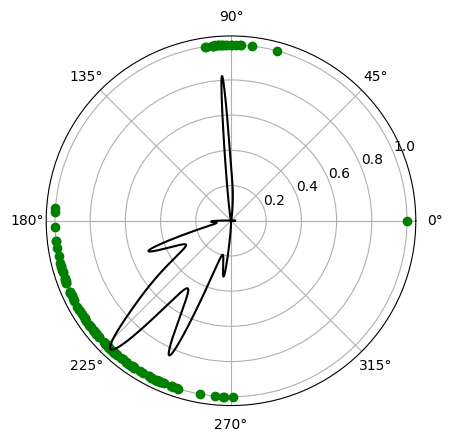

12
[ 93.3 200.1 226.8 245.4 261.6]


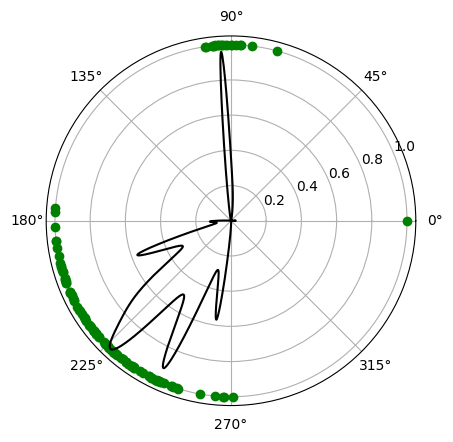

13
[ 93.3  200.7  224.1  243.9  261.45]


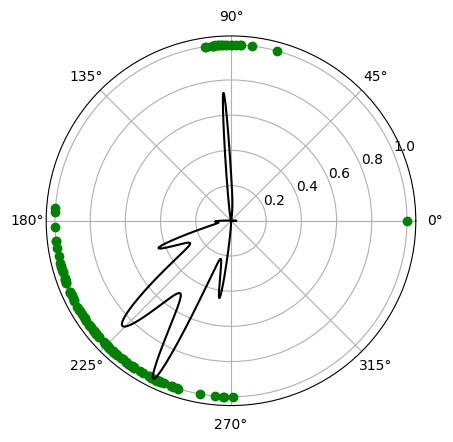

14
[ 93.15 201.75 226.95 245.1  261.45]


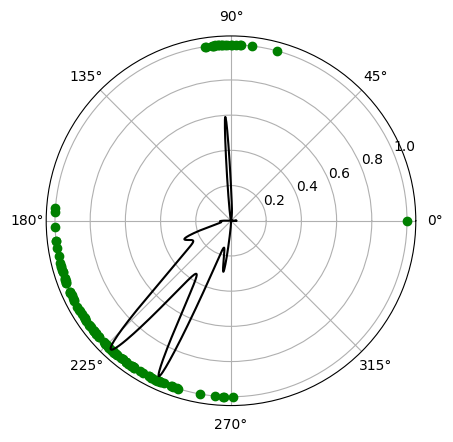

15
[ 93.15 225.15 244.35 261.  ]


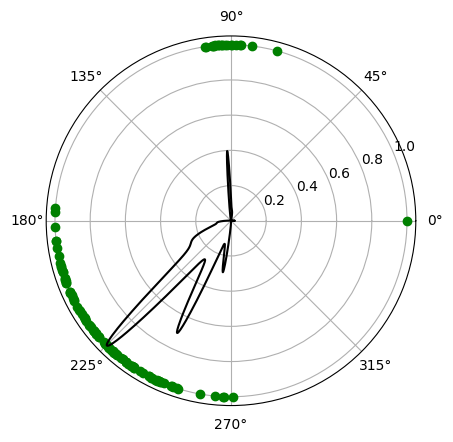

16
[ 93.   190.35 218.85 246.9  259.65]


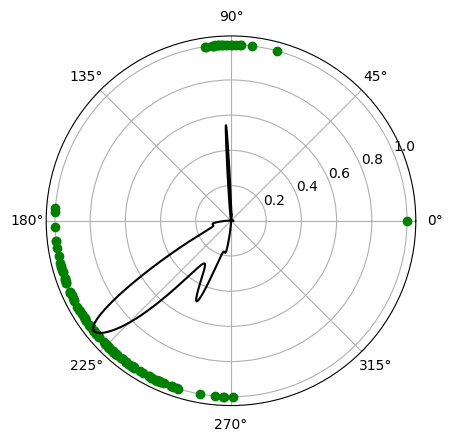

17
[ 93.3 189.9 221.7 247.2 263.7]


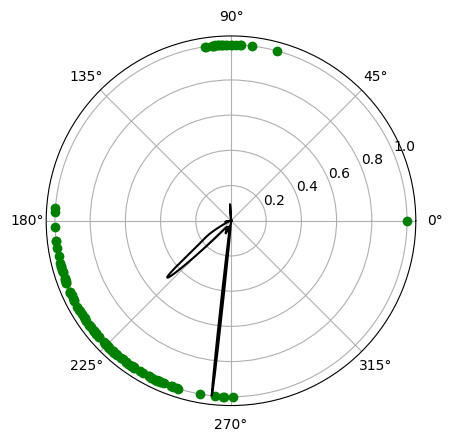

18
[ 78.    94.2  187.05 210.3  222.9  244.2  263.25]


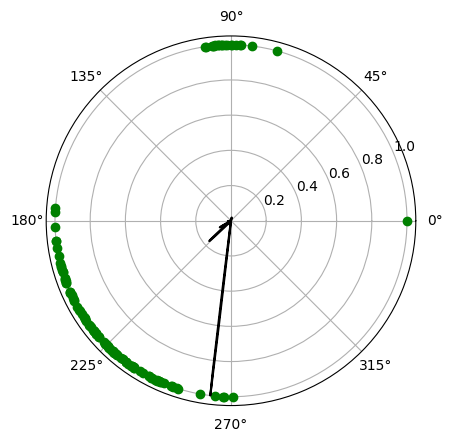

In [53]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)

plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

print("Dataset I")
for i in range(1, len(antenna_positions)):                 # interesting values: 4 - 12
    print(i)
    plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, i, time_t, resolution)

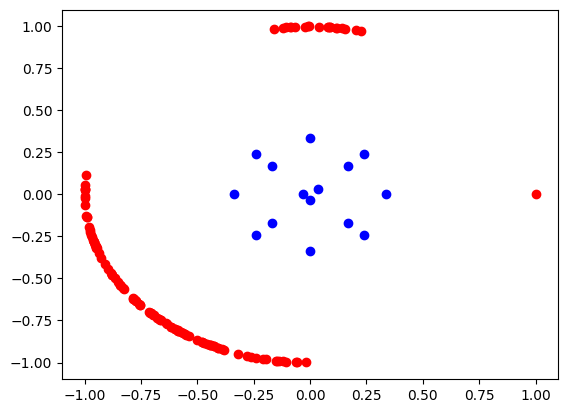

Dataset 2
1
[189.15 243.9 ]


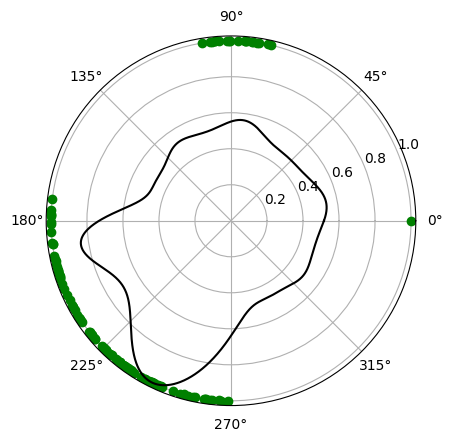

2
[ 88.65 185.85 227.4  263.25]


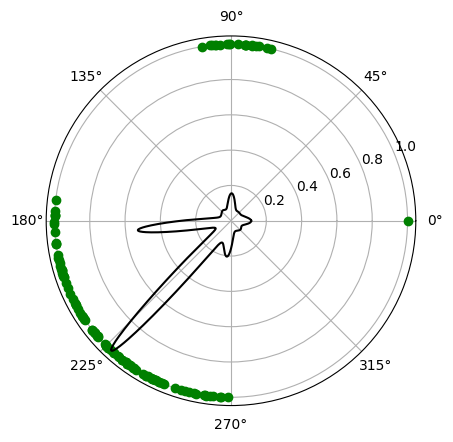

3
[208.2 235.5]


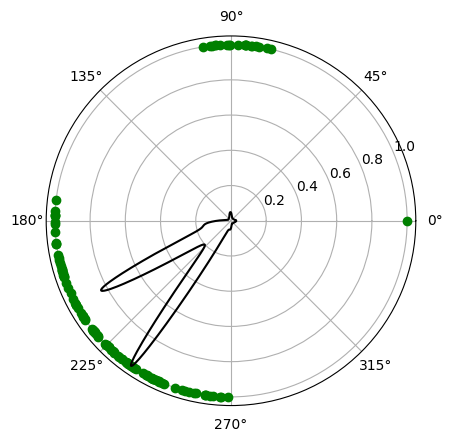

4
[ 88.5 208.2 231.6]


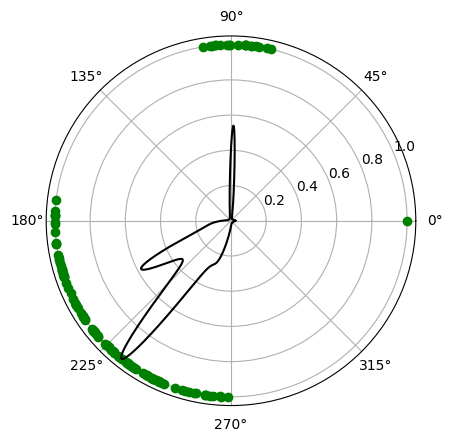

5
[ 87.15 201.45 222.45 241.65]


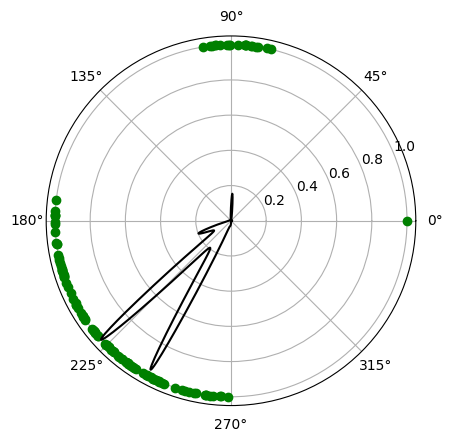

6
[ 86.55 189.75 219.45 237.75 257.85]


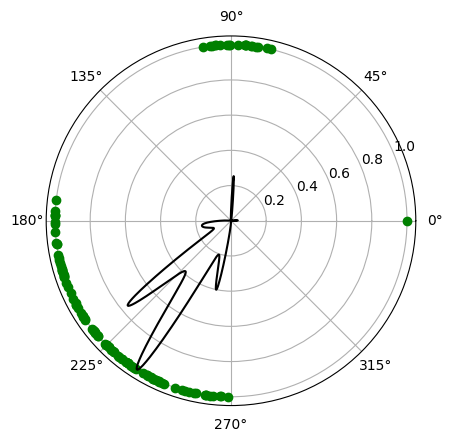

7
[ 82.35  93.15 182.1  200.25 222.6  236.85 261.75]


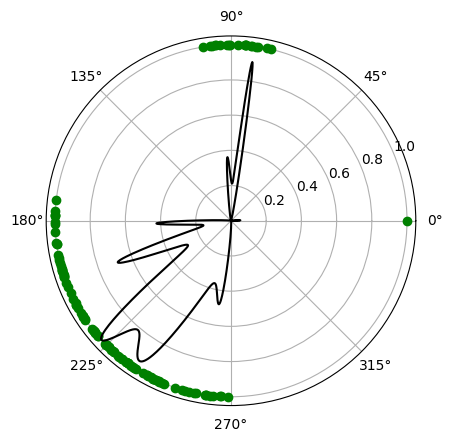

8
[ 82.5   93.45 181.95 200.85 225.9  262.05]


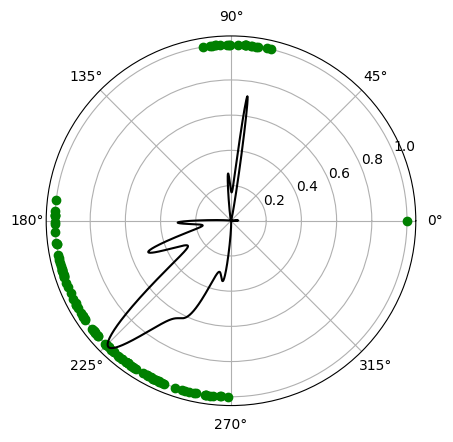

9
[ 82.5   94.5  181.8  201.75 227.1  247.05 262.8 ]


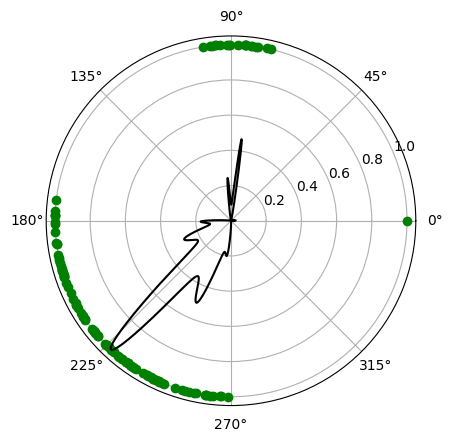

10
[ 82.65  94.5  181.65 201.3  226.95 246.45 262.8 ]


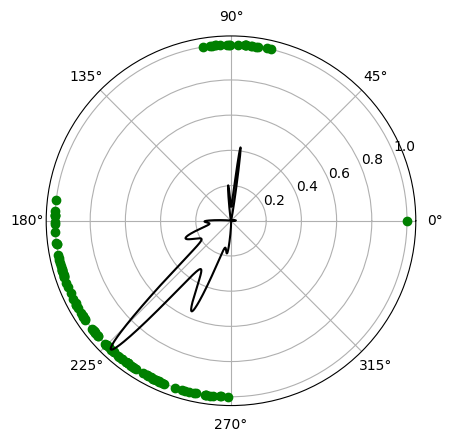

11
[ 82.5   94.35 180.3  208.8  227.7  246.75 263.85]


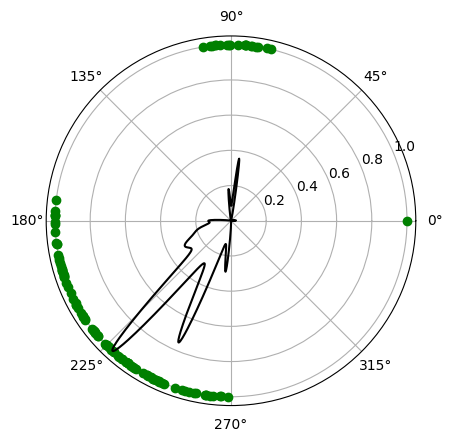

12
[ 82.65  94.8  179.25 198.6  226.5  247.65 264.75]


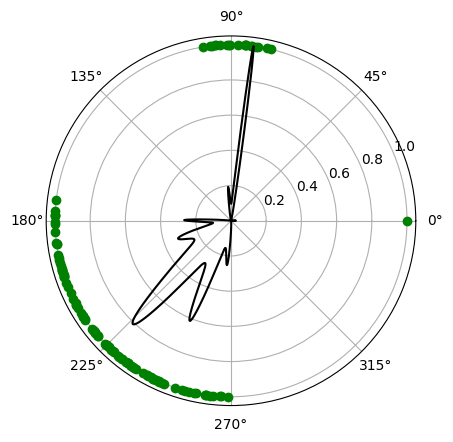

13
[ 82.65  93.15 178.5  196.8  224.25 249.45 265.5 ]


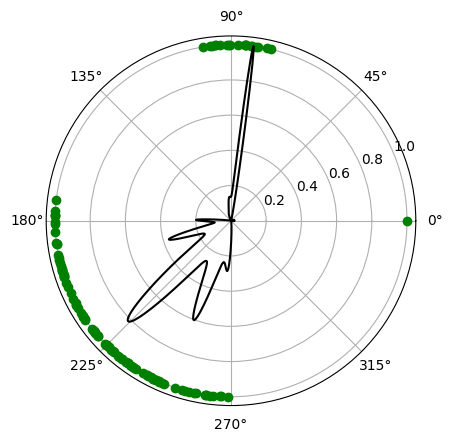

14
[ 81.9  180.45 199.95 223.35 242.55 262.8  358.95]


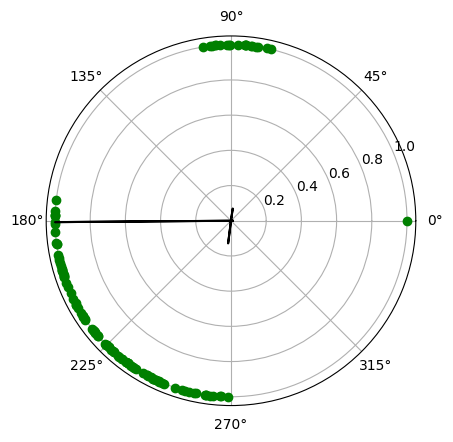

In [54]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()
print("Dataset 2")
for i in range(1, len(antenna_positions)):                 # interesting values: 4 - 12
    print(i)
    plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, i, time_t, resolution)

In [ ]:
# Simulated data

simulated_transmitter_positions = np.array(
    [
        [0, 1],
        [1, 0],
        [-1, 0],
        [0, -1]
    ]
)

In [ ]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         simulated_transmitter_positions[:,0],
         simulated_transmitter_positions[:,1],
         'ro'
         )
plt.show()

## Matched beamforming test

In [ ]:
angle = 225
angle = angle * np.pi/180
r0 = np.array([np.cos(angle), np.sin(angle)])
b_gains, ts = matched_beam(antenna_positions, wavelength, r0)

In [ ]:
plt.polar(ts, b_gains/np.max(b_gains), '-k')
plt.show()

In [ ]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

In [ ]:
variance_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)